In [1]:
# version 1.1.1 
#model, pre-processing, explanation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder

sns.set()

pd.set_option('display.max_columns', None)

In [2]:
raw_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
raw_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Exploratory Data Analysis**

In [5]:
categorical_nominal_cols = ['MSSubClass', 'MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 
                            'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 
                            'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 
                            'Exterior2nd', 'MasVnrType','Foundation','Heating','Electrical', 'Functional',
                            'GarageType','MiscFeature', 'SaleType','SaleCondition']

categorical_ordinal_cols = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','ExterQual', 
                            'ExterCond', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                            'BsmtFinType2','HeatingQC', 'KitchenQual', 'FireplaceQu','GarageYrBlt', 
                            'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC','Fence']

categorical_bool_cols = ['CentralAir']

In [6]:
categorical_ordinal_encoding = {}
categorical_ordinal_encoding["ExterQual"] = {
    "Po":0,
    "Fa":1,
    "TA":2,
    "Gd":3,
    "Ex":4
}

categorical_ordinal_encoding["ExterCond"] = categorical_ordinal_encoding["ExterQual"].copy()

categorical_ordinal_encoding["BsmtQual"] = {
    "NA":0,
    "Po":1,
    "Fa":2,
    "TA":3,
    "Gd":4,
    "Ex":5
}

categorical_ordinal_encoding["BsmtCond"] = categorical_ordinal_encoding["BsmtQual"].copy()

categorical_ordinal_encoding["BsmtExposure"] = {
    "NA":0,
    "No":1,
    "Mn":2,
    "Av":3,
    "Gd":4
}
categorical_ordinal_encoding["BsmtFinType1"] = {
    "NA":0,
    "Unf":1,
    "LwQ":2,
    "Rec":3,
    "BLQ":4,
    "ALQ":5,
    "GLQ":6
}
categorical_ordinal_encoding["BsmtFinType2"] = categorical_ordinal_encoding["BsmtFinType1"].copy()
categorical_ordinal_encoding["HeatingQC"] = categorical_ordinal_encoding["ExterQual"].copy()
categorical_ordinal_encoding["KitchenQual"] = categorical_ordinal_encoding["HeatingQC"].copy()
categorical_ordinal_encoding["FireplaceQu"] = categorical_ordinal_encoding["BsmtQual"].copy()

categorical_ordinal_encoding["GarageFinish"] = {
    "NA":0,
    "Unf":1,
    "RFn":2,
    "Fin":3
}

categorical_ordinal_encoding["GarageQual"] = categorical_ordinal_encoding["BsmtQual"].copy()
categorical_ordinal_encoding["GarageCond"] = categorical_ordinal_encoding["BsmtQual"].copy()
categorical_ordinal_encoding["PavedDrive"] = {
    "N":0,
    "P":1,
    "Y":2
}

categorical_ordinal_encoding["PoolQC"] = {
    "Na":0,
    "Fa":1,
    "TA":2,
    "Gd":3,
    "Ex":4
}

categorical_ordinal_encoding["Fence"] = {
    'NA' : 0,
    'MnWw' : 1,
    'GdWo' : 2,
    'MnPrv' : 3,
    'GdPrv' : 4
}

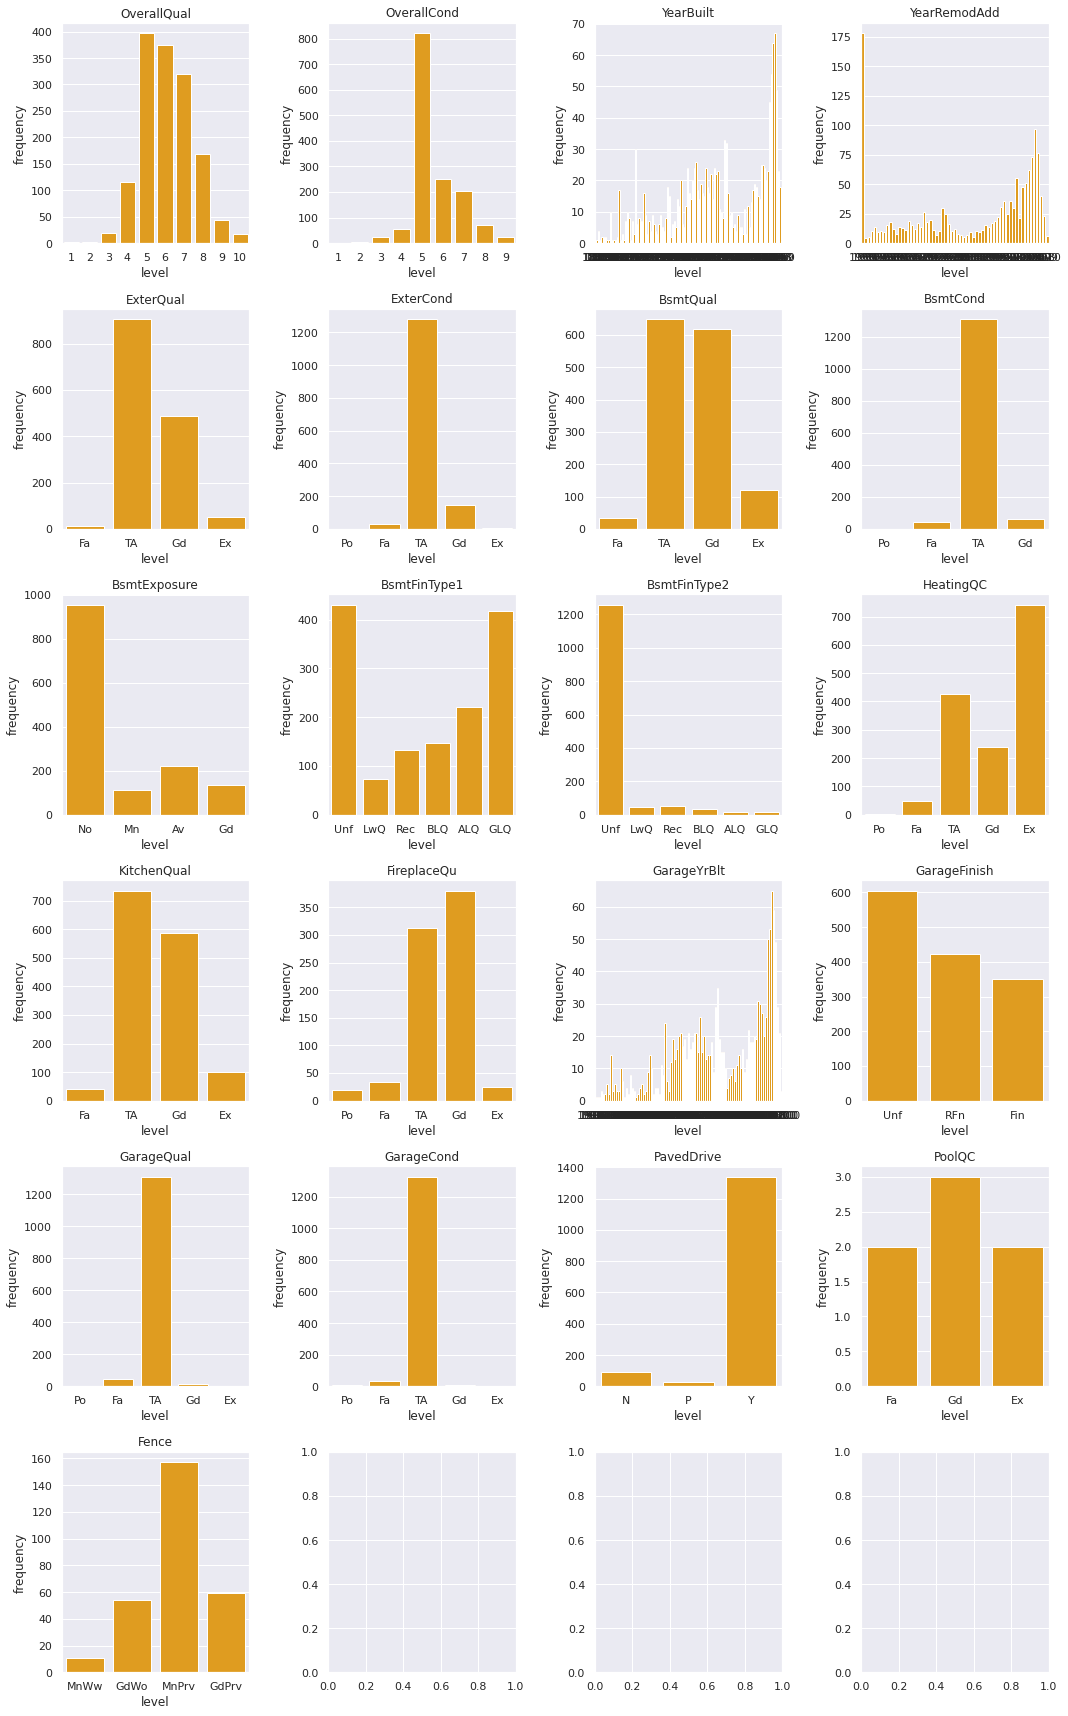

In [7]:
total_col = 4
total_row = len(categorical_ordinal_cols)//total_col
if len(categorical_ordinal_cols) % total_col > 0:
    total_row += 1
    
idx = 0
fig, axs = plt.subplots(total_row, total_col, figsize=(15,total_row * 4))
for i in range(total_row):
    for j in range(total_col):
        if idx < len(categorical_ordinal_cols): 
            title = categorical_ordinal_cols[idx]
            if title in categorical_ordinal_encoding:
                vc = raw_train[title].value_counts().reset_index()
                vc.rename(columns={'index':'code'}, inplace=True)
                vc['index'] = vc['code'].copy()
                vc['index'] = vc['index'].map(categorical_ordinal_encoding[title])
                vc.set_index('index', inplace=True)
                vc = vc.sort_index()
                sns.barplot(data=vc ,x='code', y=title, color='orange', ax = axs[i][j])
            else:
                vc = raw_train[title].value_counts().sort_index()
                sns.barplot(x=vc.index, y=vc, color='orange', ax = axs[i][j])
            
            axs[i][j].set_ylabel('frequency')
            axs[i][j].set_xlabel('level')

            axs[i][j].set_title(title)
            idx += 1

plt.tight_layout()
plt.show()

In [8]:
ordinal_columns = ['OverallQual', 'OverallCond','ExterQual', 
                'ExterCond', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2','HeatingQC', 'KitchenQual', 'FireplaceQu', 
                'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC','Fence']

ordinal_column_transforms = {}
ordinal_column_fillna = {}
ordinal_column_transforms["OverallQual"] = [[1,2,3,4,5,6,7,8,9,10], [0,0,0,0,1,2,3,4,4,4]]
ordinal_column_transforms["OverallCond"] = [[1,2,3,4,5,6,7,8,9,10], [0,0,0,0,0,1,1,1,1,1]]
ordinal_column_transforms["ExterQual"] = [["Po","Fa","TA","Gd","Ex"], [0,0,0,1,1]]
ordinal_column_transforms["ExterCond"] = [["Po","Fa","TA","Gd","Ex"], [0,0,0,1,1]]
ordinal_column_transforms["BsmtQual"] = [['NA','Po','Fa','TA','Gd','Ex'],[0,0,0,0,1,1]]
ordinal_column_transforms['BsmtCond'] = [['NA','Po','Fa','TA','Gd','Ex'],[0,0,0,0,1,1]]
ordinal_column_transforms['BsmtExposure'] = [['NA','No','Mn','Av','Gd'],[0,0,1,1,1]]
ordinal_column_transforms['BsmtFinType1'] = [['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,0,0,1,1,2,2]]
ordinal_column_transforms['BsmtFinType2'] = [['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,0,0,1,1,1,1]]
ordinal_column_transforms['HeatingQC'] = [['NA','Po','Fa','TA','Gd','Ex'],[0,0,0,0,1,1]]
ordinal_column_transforms['KitchenQual'] = [['Po','Fa','TA','Gd','Ex'],[0,0,0,1,1]]
ordinal_column_transforms['FireplaceQu'] = [['NA','Po','Fa','TA','Gd','Ex'], [0,0,0,0,1,1]]
ordinal_column_transforms['GarageFinish'] = [['NA','Unf','RFn','Fin'],[0,1,2,3]]
ordinal_column_transforms['GarageQual']  = [['NA','Po','Fa','TA','Gd','Ex'],[0,0,1,1,2,2]]
ordinal_column_transforms['GarageCond']  = [['NA','Po','Fa','TA','Gd','Ex'],[0,0,1,1,2,2]]
ordinal_column_transforms['PavedDrive']  = [['N','P','Y'],[0,0,1]]
ordinal_column_transforms['PoolQC'] = [['NA','Fa','TA','Gd','Ex'],[0,1,1,2,3]]
ordinal_column_transforms['Fence']  = [['NA','MnWw','GdWo','MnPrv','GdPrv'],[0,0,0,1,2]]

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



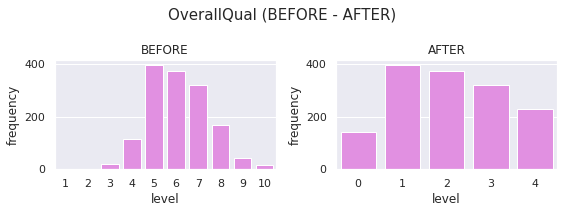

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



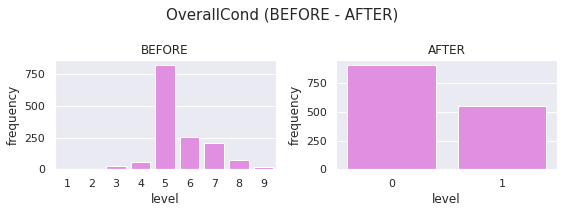

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



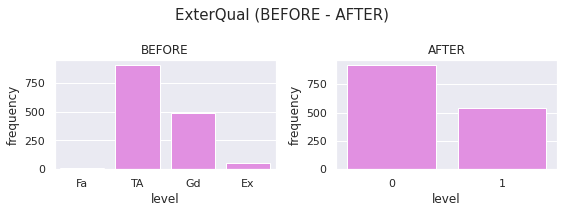

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



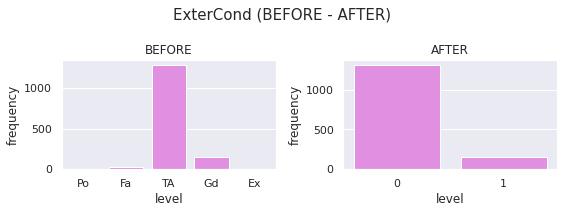

raw_train  37
raw_test  44
total_row : 1460
total value count : 1423
total null value : 37 



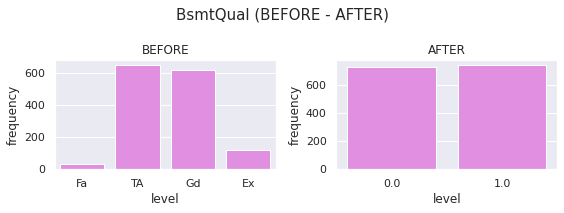

raw_train  37
raw_test  45
total_row : 1460
total value count : 1423
total null value : 37 



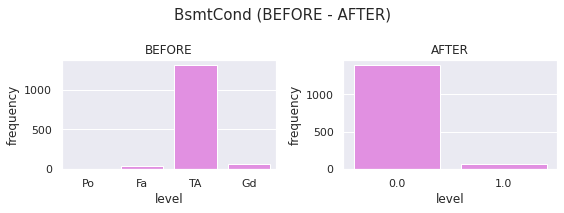

raw_train  38
raw_test  44
total_row : 1460
total value count : 1422
total null value : 38 



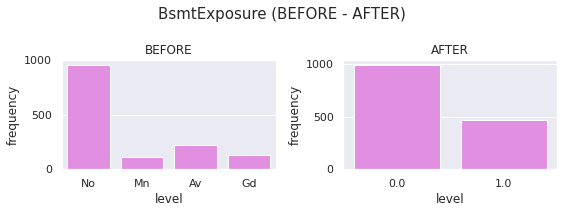

raw_train  37
raw_test  42
total_row : 1460
total value count : 1423
total null value : 37 



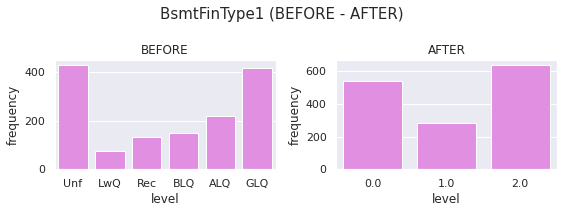

raw_train  38
raw_test  42
total_row : 1460
total value count : 1422
total null value : 38 



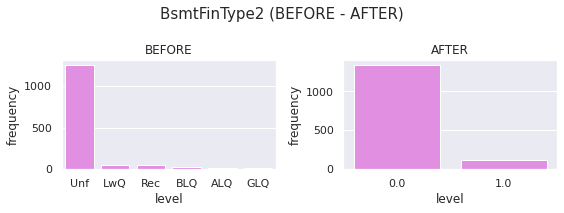

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



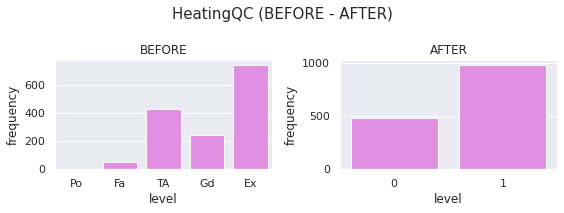

raw_train  0
raw_test  1
total_row : 1460
total value count : 1460
total null value : 0 



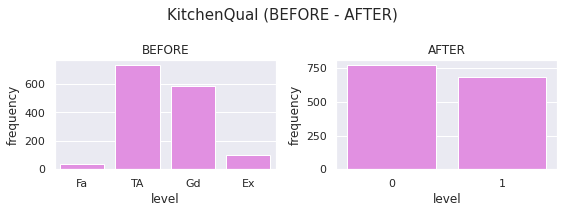

raw_train  690
raw_test  730
total_row : 1460
total value count : 770
total null value : 690 



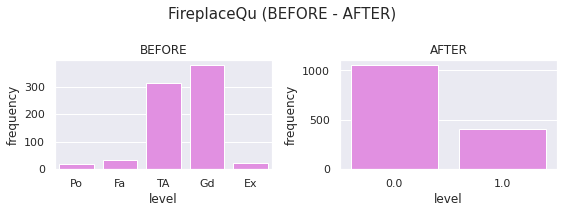

raw_train  81
raw_test  78
total_row : 1460
total value count : 1379
total null value : 81 



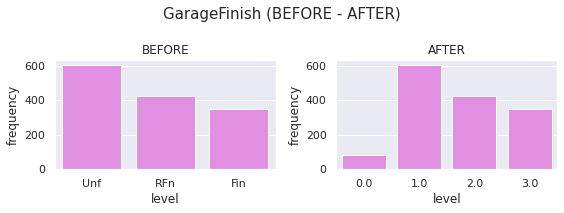

raw_train  81
raw_test  78
total_row : 1460
total value count : 1379
total null value : 81 



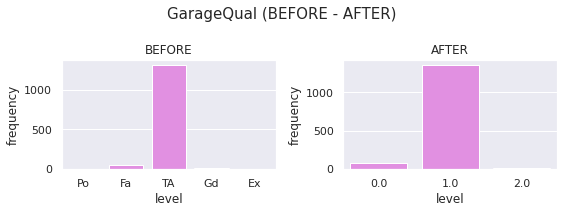

raw_train  81
raw_test  78
total_row : 1460
total value count : 1379
total null value : 81 



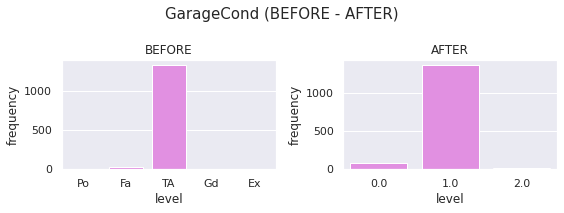

raw_train  0
raw_test  0
total_row : 1460
total value count : 1460
total null value : 0 



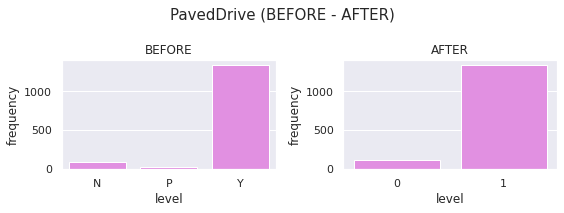

raw_train  1453
raw_test  1456
total_row : 1460
total value count : 7
total null value : 1453 



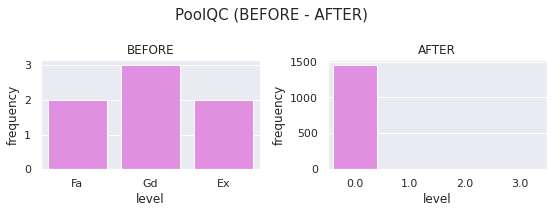

raw_train  1179
raw_test  1169
total_row : 1460
total value count : 281
total null value : 1179 



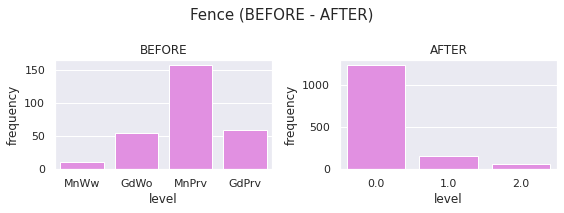

In [9]:
for title in ordinal_columns:
    print("raw_train ", raw_train[title].isna().sum())
    print("raw_test ", raw_test[title].isna().sum())
    
    vc = raw_train[title].value_counts().sort_index()
    raw_train[title].replace(ordinal_column_transforms[title][0], ordinal_column_transforms[title][1], inplace=True)
    raw_test[title].replace(ordinal_column_transforms[title][0], ordinal_column_transforms[title][1], inplace=True)
    
    raw_train[title].fillna(0, inplace=True)
    raw_test[title].fillna(0, inplace=True)
    
    vc_changed = raw_train[title].value_counts().sort_index()
    
    total_row, total_vc = raw_train.shape[0], vc.sum()
    gap = total_row - total_vc
    print('total_row :',total_row)
    print('total value count :',total_vc)
    print('total null value :',gap,'\n')
    
    fig, axs = plt.subplots(1,2,figsize=(8,3))
    
    if title in categorical_ordinal_encoding:
        vc = vc.reset_index()
        vc.rename(columns={'index':'code'}, inplace=True)
        vc['index'] = vc['code'].copy()
        vc['index'] = vc['index'].map(categorical_ordinal_encoding[title])
        vc.set_index('index', inplace=True)
        vc = vc.sort_index()
        sns.barplot(data=vc ,x='code', y=title, color='violet', ax = axs[0])
        axs[0].set_title('BEFORE',fontsize=12)
        axs[0].set_ylabel('frequency')
        axs[0].set_xlabel('level')
    else:
        sns.barplot(x=vc.index, y=vc, color='violet', ax=axs[0])
        axs[0].set_title('BEFORE',fontsize=12)
        axs[0].set_ylabel('frequency')
        axs[0].set_xlabel('level')
        
    sns.barplot(x=vc_changed.index, y=vc_changed, color='violet', ax=axs[1])
    axs[1].set_title('AFTER',fontsize=12)
    axs[1].set_ylabel('frequency')
    axs[1].set_xlabel('level')

    fig.suptitle(title+' (BEFORE - AFTER)',fontsize=15)

    #plt.title(title+' (BEFORE - AFTER)', fontsize=15)
    plt.tight_layout()
    plt.show()

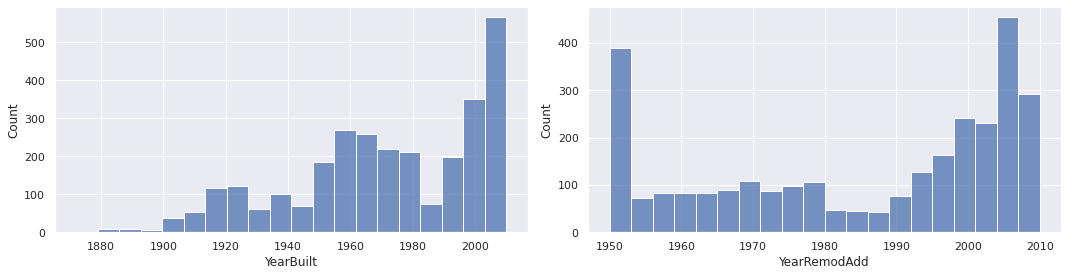

In [10]:
# ,'YearBuilt','YearRemodAdd',
comb = pd.concat((raw_train, raw_test), axis=0).reset_index()
fig, axs = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data=comb, bins=20,x='YearBuilt', ax = axs[0])
sns.histplot(data=comb, bins=20,x='YearRemodAdd', ax = axs[1])
plt.tight_layout()
plt.show()

In [11]:
comb.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,3,0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,1,0,PConc,1.0,0.0,0.0,2.0,706.0,0.0,0.0,150.0,856.0,GasA,1,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,1.0,8,Typ,0,0.0,Attchd,2003.0,2.0,2.0,548.0,1.0,1.0,1,0,61,0,0,0,0,0.0,0.0,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,2,1,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,0,CBlock,1.0,0.0,1.0,2.0,978.0,0.0,0.0,284.0,1262.0,GasA,1,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,0.0,6,Typ,1,0.0,Attchd,1976.0,2.0,2.0,460.0,1.0,1.0,1,298,0,0,0,0,0,0.0,0.0,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,3,0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,1,0,PConc,1.0,0.0,1.0,2.0,486.0,0.0,0.0,434.0,920.0,GasA,1,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,1.0,6,Typ,1,0.0,Attchd,2001.0,2.0,2.0,608.0,1.0,1.0,1,0,42,0,0,0,0,0.0,0.0,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,3,0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,0,BrkTil,0.0,1.0,0.0,2.0,216.0,0.0,0.0,540.0,756.0,GasA,1,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,1.0,7,Typ,1,1.0,Detchd,1998.0,1.0,3.0,642.0,1.0,1.0,1,0,35,272,0,0,0,0.0,0.0,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,4,0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,1,0,PConc,1.0,0.0,1.0,2.0,655.0,0.0,0.0,490.0,1145.0,GasA,1,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,1.0,9,Typ,1,0.0,Attchd,2000.0,2.0,3.0,836.0,1.0,1.0,1,192,84,0,0,0,0,0.0,0.0,NaN,0,12,2008,WD,Normal,250000.0


In [12]:
def updateDfWithBins(val, bins):
    bins = bins.reshape(-1,1)
    bins2 = bins[1:]
    bins2 = np.append(bins2,2700).reshape(-1,1)
    bins_comb = np.concatenate((bins, bins2), axis=1)
    bins_comb
    
    for idx,(a,b) in enumerate(bins_comb):
        if val >= a and val <= b:
            return round(b)
    print(bins_comb)
    print(val)
    return 0 

In [13]:
# update categorical_ordinal_cols
# update categorical_nominal_cols
# update categorical bool cols
def updateCols(pd_data, categorical_cols):
    columns = pd_data.columns.values
    res_col = categorical_cols.copy()
    tot_del = 0
    for i, v in enumerate(categorical_cols):
        if v not in columns:
            res_col.pop((i - tot_del))
            tot_del += 1
        
    return res_col

del_cols = ['ExterCond', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'PavedDrive','PoolQC', 'GarageYrBlt', 'YearBuilt']
raw_train.drop(columns = del_cols, inplace=True)
raw_test.drop(columns = del_cols, inplace=True)

categorical_ordinal_cols = updateCols(raw_train, categorical_ordinal_cols)

In [14]:
categorical_ordinal_cols

['OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'Fence']

In [15]:
raw_test['SalePrice'] = np.zeros(raw_test.shape[0], dtype=np.int64)
raw_all = pd.concat((raw_train,raw_test),axis=0).reset_index()

In [16]:
#I created a variable to group numerical quantitative data types into numerical_quintatif_cols variable variables
numerical_quintatif_cols = []
for column in raw_all.columns.values:
    if column not in categorical_bool_cols and column not in categorical_nominal_cols and column not in categorical_ordinal_cols:
        numerical_quintatif_cols.append(column)
len(numerical_quintatif_cols)

33

8 4


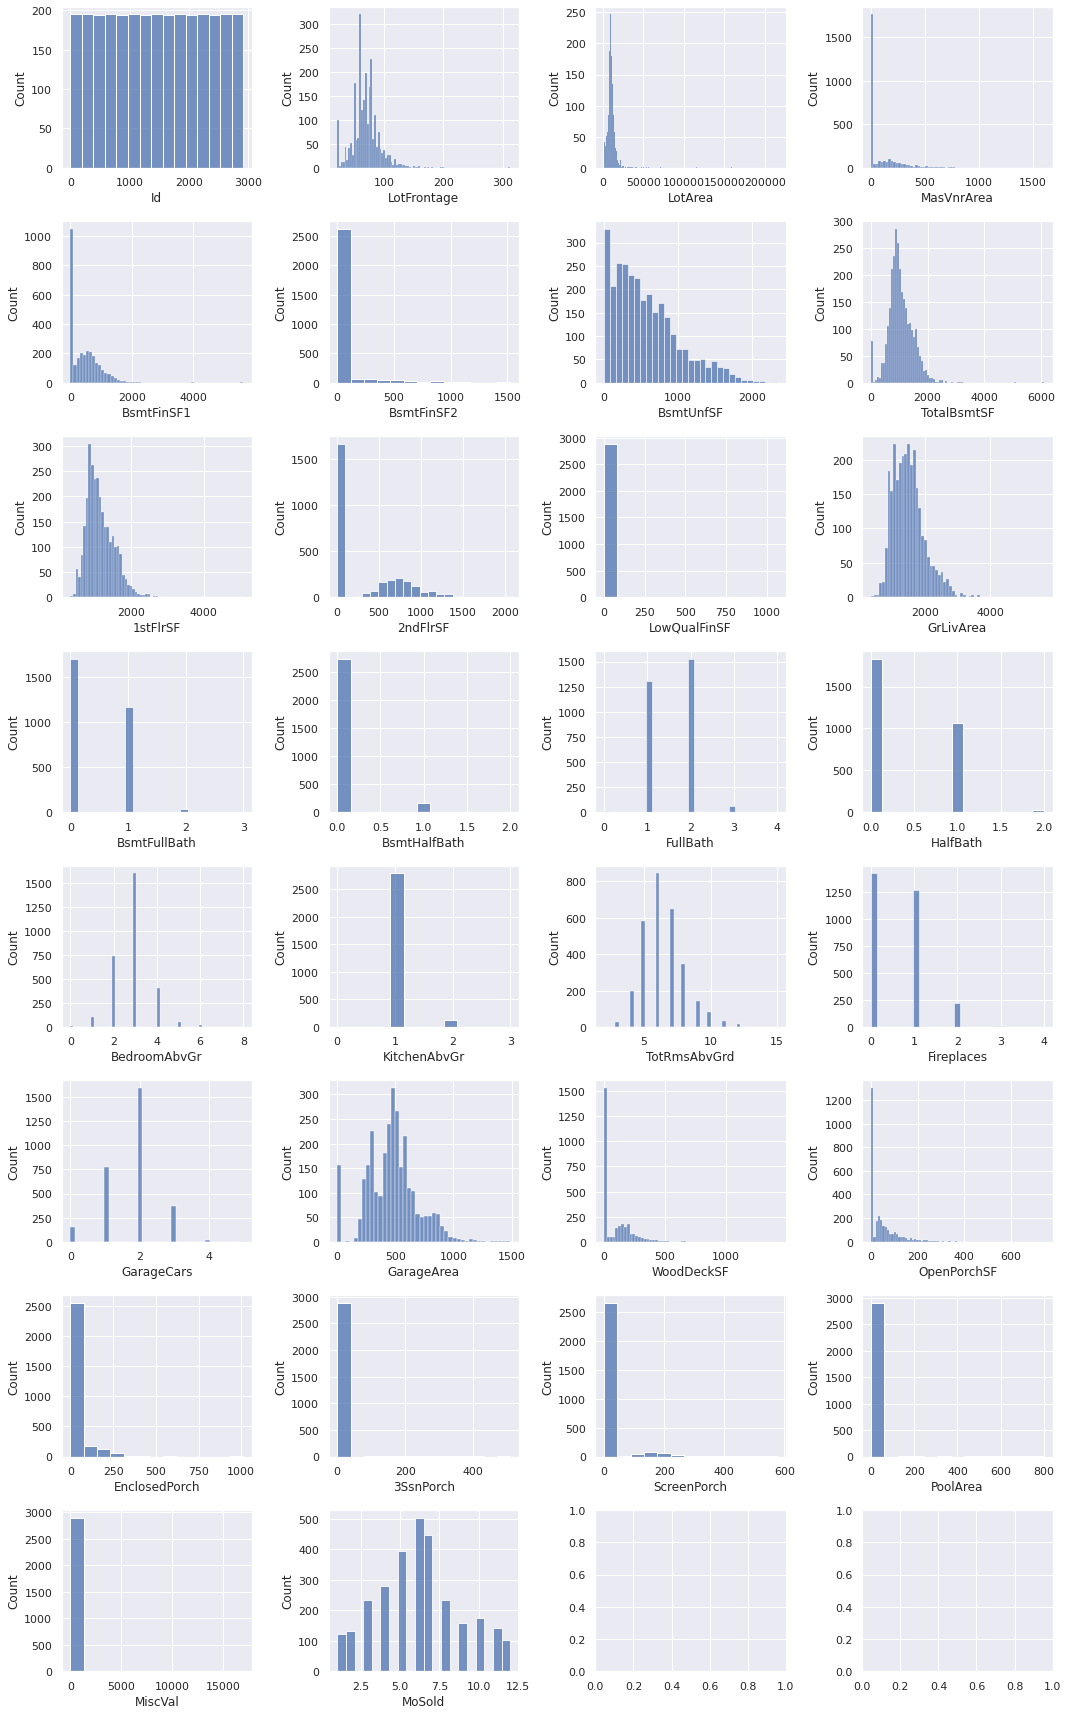

In [17]:
len_data = len(numerical_quintatif_cols[1:-1])
total_col = 4
total_row = len_data/ total_col
if total_row  % total_col > 0:
    total_row += 1
total_row = int(total_row)  
print(total_row, total_col)
idx = 1
fig, axs = plt.subplots(total_row, total_col, figsize=(15,(total_row * 3)))
for i in range(total_row):
    for j in range(total_col):
        if len_data > idx:
            selected_col = numerical_quintatif_cols[idx]
#             print(selected_col, i, j)
            sns.histplot(data=raw_all , x=selected_col, ax=axs[i][j])
            idx += 1
plt.tight_layout()
plt.show()

In [18]:
check_null_cols = raw_all.isna().sum()
check_null_cols_ver2 = (check_null_cols[check_null_cols > 0] / raw_all.shape[0]) * 100
check_null_cols_ver3 = (check_null_cols_ver2[check_null_cols_ver2 > 50])

raw_all_ver2 = raw_all.drop(columns=check_null_cols_ver3.index).reset_index()
print("Remove feature unnecessary")
print("Before",raw_all.shape)
print("After", raw_all_ver2.shape)

Remove feature unnecessary
Before (2919, 74)
After (2919, 73)


In [19]:
print("Check empty cell")
check_null_cols = raw_all_ver2.isna().sum()
check_null_cols_ver2 = (check_null_cols[check_null_cols > 0] / raw_all_ver2.shape[0]) * 100
round(check_null_cols_ver2,2)

Check empty cell


MSZoning         0.14
LotFrontage     16.65
Utilities        0.07
Exterior1st      0.03
Exterior2nd      0.03
MasVnrType       0.82
MasVnrArea       0.79
BsmtFinSF1       0.03
BsmtFinSF2       0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Electrical       0.03
BsmtFullBath     0.07
BsmtHalfBath     0.07
Functional       0.07
GarageType       5.38
GarageCars       0.03
GarageArea       0.03
SaleType         0.03
dtype: float64

In [20]:
numerical_quintatif_cols = updateCols(raw_all_ver2, numerical_quintatif_cols)

In [21]:
raw_all_ver3 = raw_all_ver2.copy()
for column in check_null_cols_ver2.index:
    if column in categorical_ordinal_cols:
        vc = raw_all_ver3[column].value_counts()
        raw_all_ver3[column].fillna(vc.idxmax(), inplace=True)
    elif column in categorical_nominal_cols:
        raw_all_ver3[column].fillna('unknown', inplace=True)
    else:
        mean = raw_all_ver3[column].mean()
        raw_all_ver3[column].fillna(mean, inplace=True)

In [22]:
print("Check empty cell")
check_null_cols = raw_all_ver3.isna().sum()
check_null_cols_ver2 = (check_null_cols[check_null_cols > 0] / raw_all_ver3.shape[0]) * 100
round(check_null_cols_ver2,2)

Check empty cell


Series([], dtype: float64)

In [23]:
categorical_nominal2encode = {}
for column in raw_all_ver3.columns.values:
    if column in categorical_nominal_cols or column in categorical_bool_cols:
        uq = raw_all_ver3[column].unique()
        categorical_nominal2encode[column] = {}
        for i, val in enumerate(uq):
            categorical_nominal2encode[column][val] = i

In [24]:
raw_all_ver4 = raw_all_ver3.copy()
print("I will change categorical ordinal and nominal feature to number")
for column in raw_all_ver4.columns.values:
    if column in categorical_ordinal_cols:
        if pd.api.types.is_numeric_dtype(raw_all_ver3[column]) == False:
            raw_all_ver4[column] = raw_all_ver4[column].map(categorical_ordinal_encoding[column])
    elif column in categorical_nominal_cols or column in categorical_bool_cols:
        raw_all_ver4[column] = raw_all_ver4[column].map(categorical_nominal2encode[column])
raw_all_ver4.head()

I will change categorical ordinal and nominal feature to number


,level_0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,1,0,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,3,0,2003,0,0,0,0,0,196.0,1,0,1.0,0.0,2.0,706.0,0.0,150.0,856.0,0,1,0,0,856,854,0,1710,1.0,0.0,2,1,3,1,1.0,8,0,0,0.0,0,2.0,2.0,548.0,1.0,0,61,0,0,0,0,0.0,0,2,2008,0,0,208500
1,1,1,2,1,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,2,1,1976,0,0,1,1,1,0.0,0,1,1.0,1.0,2.0,978.0,0.0,284.0,1262.0,0,1,0,0,1262,0,0,1262,0.0,1.0,2,0,3,1,0.0,6,0,1,0.0,0,2.0,2.0,460.0,1.0,298,0,0,0,0,0,0.0,0,5,2007,0,0,181500
2,2,2,3,0,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,3,0,2002,0,0,0,0,0,162.0,1,0,1.0,1.0,2.0,486.0,0.0,434.0,920.0,0,1,0,0,920,866,0,1786,1.0,0.0,2,1,3,1,1.0,6,0,1,0.0,0,2.0,2.0,608.0,1.0,0,42,0,0,0,0,0.0,0,9,2008,0,0,223500
3,3,3,4,2,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,3,0,1970,0,0,2,2,1,0.0,0,2,0.0,0.0,2.0,216.0,0.0,540.0,756.0,0,1,0,0,961,756,0,1717,1.0,0.0,1,0,3,1,1.0,7,0,1,1.0,1,1.0,3.0,642.0,1.0,0,35,272,0,0,0,0.0,0,2,2006,0,1,140000
4,4,4,5,0,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,4,0,2000,0,0,0,0,0,350.0,1,0,1.0,1.0,2.0,655.0,0.0,490.0,1145.0,0,1,0,0,1145,1053,0,2198,1.0,0.0,2,1,4,1,1.0,9,0,1,0.0,0,2.0,3.0,836.0,1.0,192,84,0,0,0,0,0.0,0,12,2008,0,0,250000


In [25]:
data_train = raw_all_ver3[raw_all_ver3['SalePrice'] > 0]
data_test = raw_all_ver3[raw_all_ver3['SalePrice'] == 0]

data_train_encode = raw_all_ver4[raw_all_ver4['SalePrice'] > 0]
data_test_encode = raw_all_ver4[raw_all_ver4['SalePrice'] == 0]

In [26]:
categorical_bool_cols = updateCols(data_train, categorical_bool_cols)
categorical_nominal_cols = updateCols(data_train, categorical_nominal_cols)
categorical_ordinal_cols = updateCols(data_train, categorical_ordinal_cols)

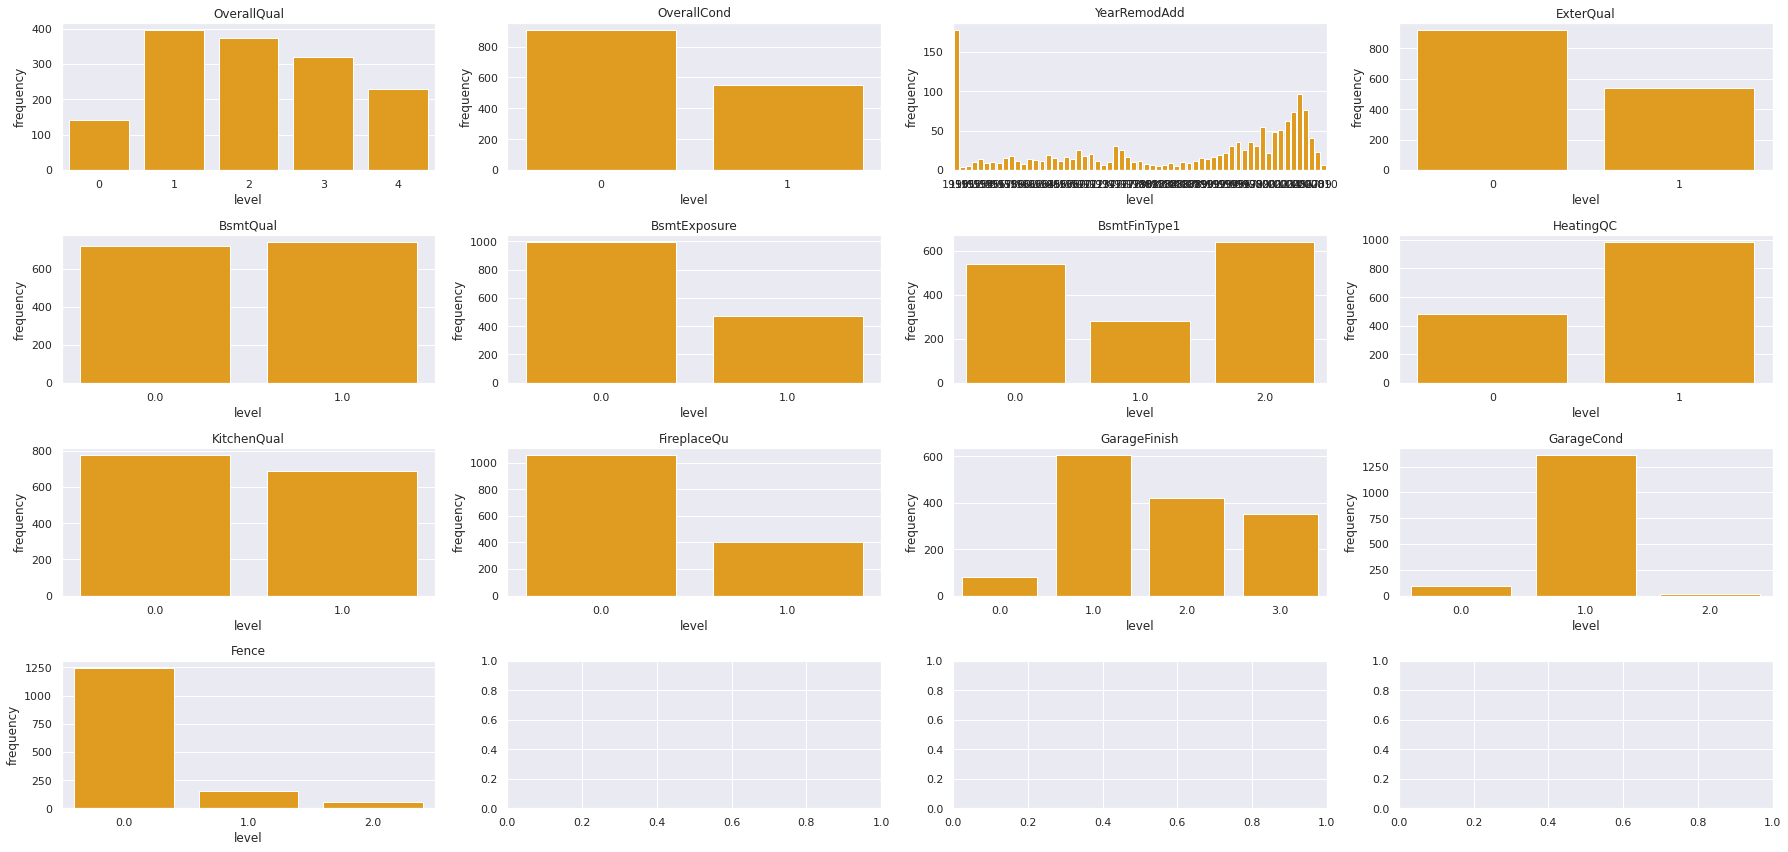

In [27]:
total_col = 4
total_row = len(categorical_ordinal_cols)//total_col + 1

idx = 0
fig, axs = plt.subplots(total_row, total_col, figsize=(25,total_row * 3))
for i in range(total_row):
    for j in range(total_col):
        if idx < len(categorical_ordinal_cols): 
            title = categorical_ordinal_cols[idx]
            vc = data_train_encode[title].value_counts().sort_index()
            sns.barplot(x=vc.index, y=vc, color='orange', ax = axs[i][j])
            axs[i][j].set_ylabel('frequency')
            axs[i][j].set_xlabel('level')

            axs[i][j].set_title(title)
            idx += 1

plt.tight_layout()
plt.show()

In [28]:
#I created a variable to group numerical quantitative data types into numerical_quintatif_cols variable variables
numerical_quintatif_cols = []
for column in data_train_encode.columns.values:
    if column not in categorical_bool_cols and column not in categorical_nominal_cols and column not in categorical_ordinal_cols:
        numerical_quintatif_cols.append(column)
len(numerical_quintatif_cols)

34

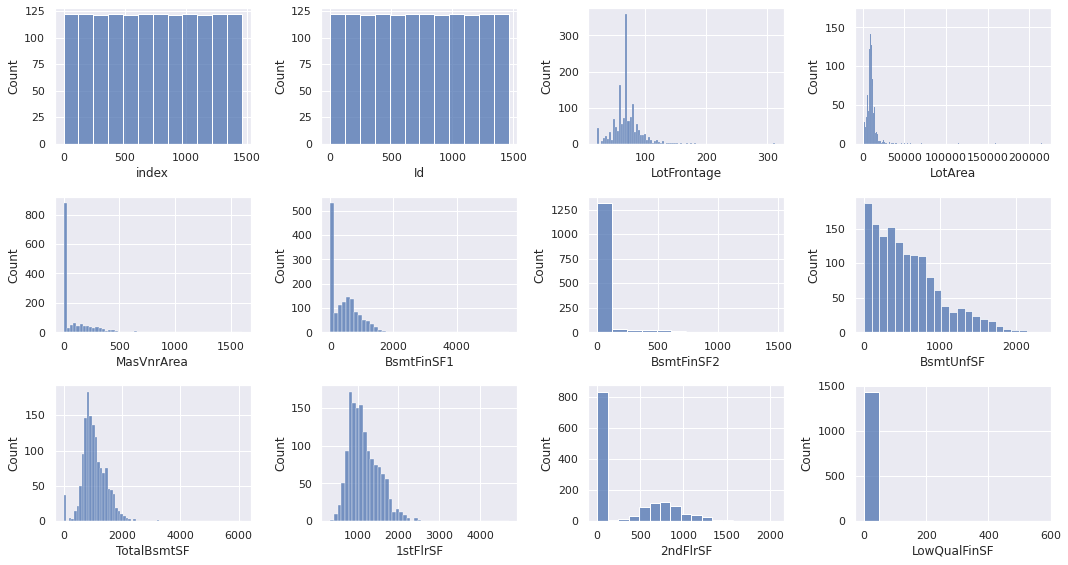

In [29]:
idx = 1
fig, axs = plt.subplots(3,4, figsize=(15,8))
for i in range(3):
    for j in range(4):
        if len(numerical_quintatif_cols) > idx:
            sns.histplot(x = data_train[numerical_quintatif_cols[idx]], ax=axs[i][j])
            idx += 1
plt.tight_layout()
plt.show()

In [30]:
data_train[numerical_quintatif_cols[1:]].skew()

index             0.000000
Id                0.000000
LotFrontage       2.402352
LotArea          12.207688
MasVnrArea        2.676546
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [31]:
treshold_skew = 2
pd_check_skew = data_train[numerical_quintatif_cols[1:]].skew()
pd_check_skew[pd_check_skew < treshold_skew].index

Index(['index', 'Id', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
print('Before Delete Feature')
print('Data train',data_train_encode.shape)
print('Data test',data_test_encode.shape,'\n')

data_train_encode.drop(columns=pd_check_skew[pd_check_skew > treshold_skew].index, inplace=True)
data_test_encode.drop(columns=pd_check_skew[pd_check_skew > treshold_skew].index, inplace=True)

print('\nAfter Delete Feature')
print('Data train',data_train_encode.shape)
print('Data test',data_test_encode.shape,'\n')

Before Delete Feature
Data train (1460, 73)
Data test (1459, 73) 


After Delete Feature
Data train (1460, 60)
Data test (1459, 60) 



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
for column in pd_check_skew[pd_check_skew > treshold_skew].index:
    numerical_quintatif_cols.remove(column)

print(numerical_quintatif_cols)

['level_0', 'index', 'Id', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MoSold', 'YrSold', 'SalePrice']


In [34]:
treshold_corr = 0.3
corr = data_train_encode[numerical_quintatif_cols].corr()['SalePrice']
corr[corr < treshold_corr].index

Index(['level_0', 'index', 'Id', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath',
       'BedroomAbvGr', 'MoSold', 'YrSold'],
      dtype='object')

In [35]:
print('Before Delete Feature')
print('Data train',data_train_encode.shape)
print('Data test',data_test_encode.shape,'\n')

data_train_encode.drop(columns=corr[corr < treshold_corr].index, inplace=True)
data_test_encode.drop(columns=corr[corr < treshold_corr].index, inplace=True)

print('\nAfter Delete Feature')
print('Data train',data_train_encode.shape)
print('Data test',data_test_encode.shape,'\n')

Before Delete Feature
Data train (1460, 60)
Data test (1459, 60) 


After Delete Feature
Data train (1460, 51)
Data test (1459, 51) 



In [36]:
for column in corr[corr < treshold_corr].index:
    numerical_quintatif_cols.remove(column)

print(numerical_quintatif_cols)

['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'SalePrice']


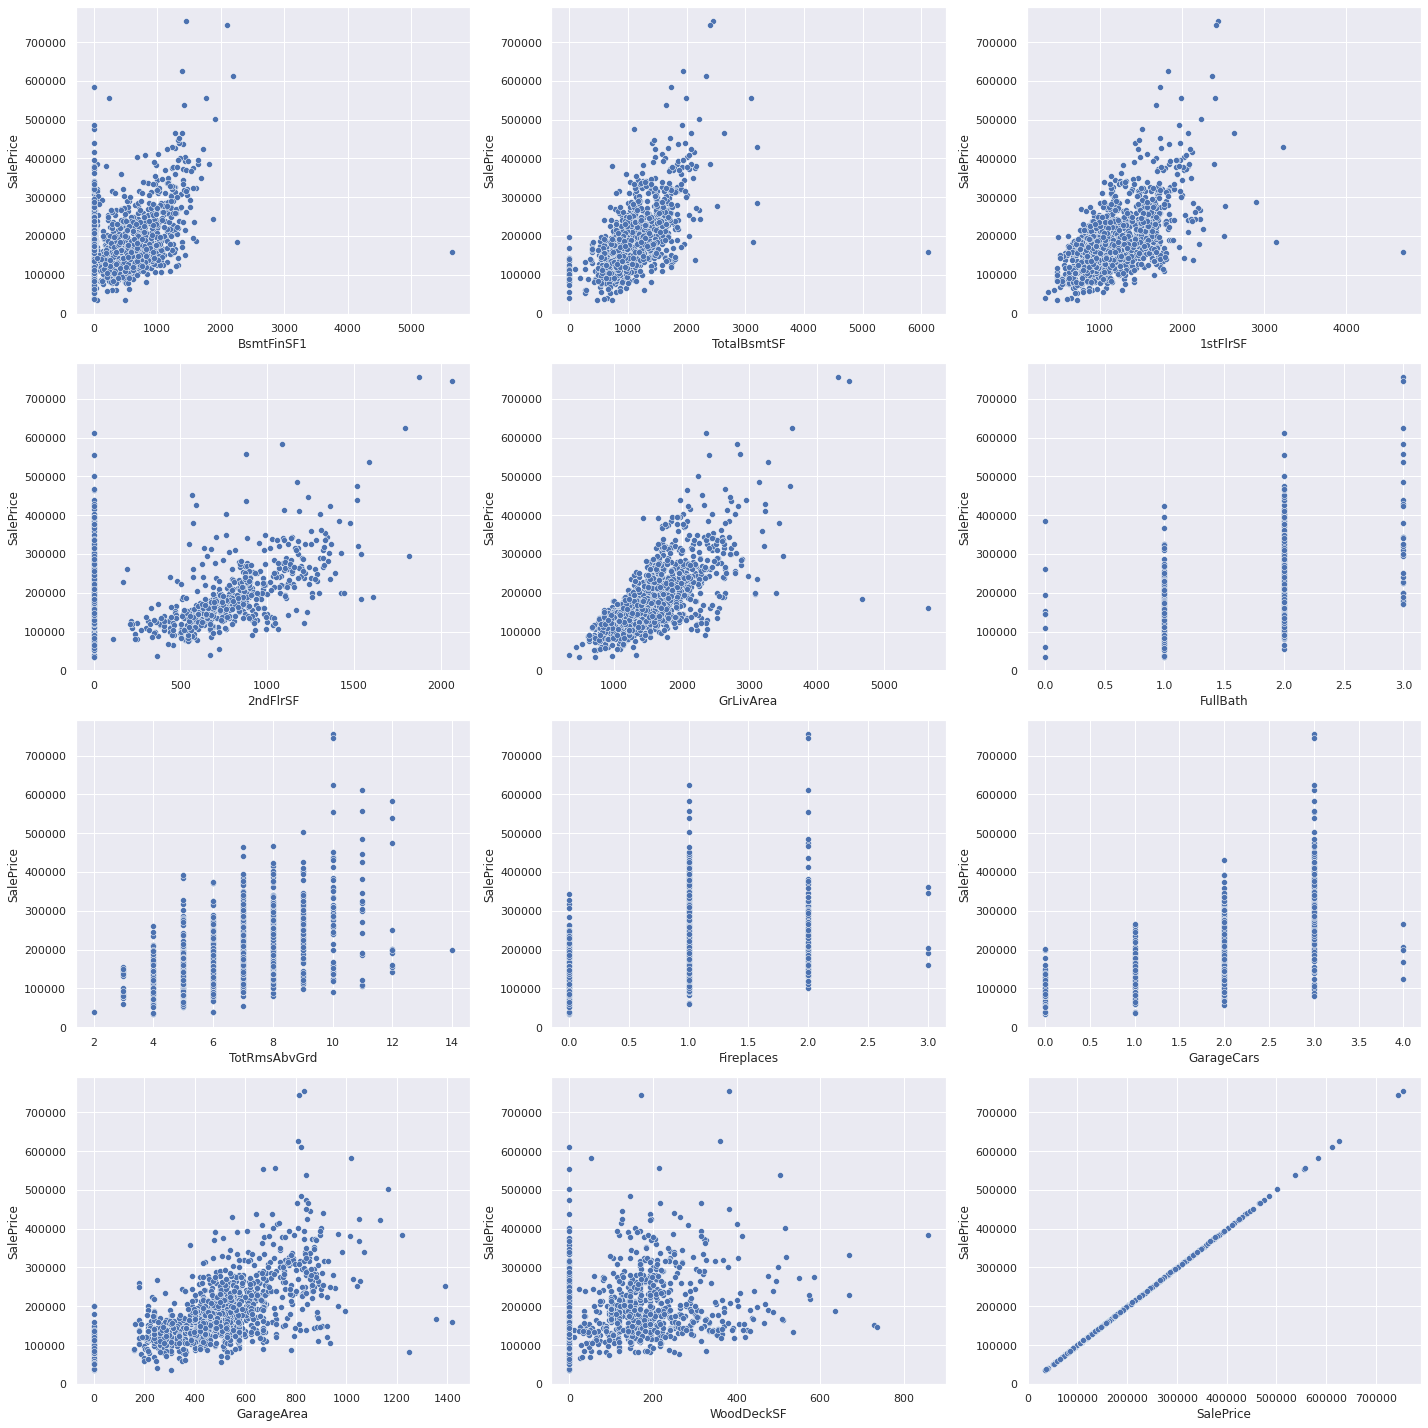

In [37]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
idx = 0
for  i in range(4):
    for j in range(3):
        if idx < len(numerical_quintatif_cols):
            sns.scatterplot(x=numerical_quintatif_cols[idx], y='SalePrice', data=data_train_encode, ax = axs[i][j])
            idx += 1

plt.tight_layout()
plt.show()

In [38]:
numerical_quintatif_cols

['BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'SalePrice']

In [39]:
col_train_wd = data_train_encode['2ndFlrSF'].copy()
col_test_wd = data_test_encode['2ndFlrSF'].copy()
col_train_wd.replace(col_train_wd[col_train_wd > 0].to_numpy(), 1, inplace=True)
col_test_wd.replace(col_test_wd[col_test_wd > 0].to_numpy(), 1, inplace=True)

data_train_encode['2ndFlrSF'] = col_train_wd.copy()
data_test_encode['2ndFlrSF'] = col_test_wd.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [40]:
col_train_wd = data_train_encode['WoodDeckSF'].copy()
col_test_wd = data_test_encode['WoodDeckSF'].copy()
col_train_wd = col_train_wd.replace(col_train_wd[col_train_wd > 0].to_numpy(), 1)
col_test_wd = col_test_wd.replace(col_test_wd[col_test_wd > 0].to_numpy(), 1)

data_train_encode['WoodDeckSF'] = col_train_wd.copy()
data_test_encode['WoodDeckSF'] = col_test_wd.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
col_train_wd = data_train_encode['BsmtFinSF1'].copy()
col_test_wd = data_test_encode['BsmtFinSF1'].copy()

col_train_wd = col_train_wd.replace(col_train_wd[col_train_wd > 0].to_numpy(), 1)
col_test_wd = col_test_wd.replace(col_test_wd[col_test_wd > 0].to_numpy(), 1)

data_train_encode['BsmtFinSF1'] = col_train_wd.copy()
data_test_encode['BsmtFinSF1'] = col_test_wd.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
col_train_wd = data_train_encode['FullBath'].copy()
col_test_wd = data_test_encode['FullBath'].copy()

col_train_wd = col_train_wd.replace(col_train_wd[col_train_wd <= 1].to_numpy(), 0)
col_train_wd = col_train_wd.replace(col_train_wd[col_train_wd >= 2].to_numpy(), 1)

col_test_wd = col_test_wd.replace(col_test_wd[col_test_wd <= 1].to_numpy(), 0)
col_test_wd = col_test_wd.replace(col_test_wd[col_test_wd >= 2].to_numpy(), 1)

data_train_encode['FullBath'] = col_train_wd.copy()
data_test_encode['FullBath'] = col_test_wd.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [43]:
col_train_wd = data_train_encode['Fireplaces'].copy()
col_test_wd = data_test_encode['Fireplaces'].copy()

# print(col_test_wd.value_counts())
# print(col_train_wd.value_counts(),'\n')

col_train_wd = col_train_wd.replace(col_train_wd[col_train_wd > 1].to_numpy(), 2)
col_test_wd = col_test_wd.replace(col_test_wd[col_test_wd > 1].to_numpy(), 2)

data_train_encode['Fireplaces'] = col_train_wd.copy()
data_test_encode['Fireplaces'] = col_test_wd.copy()

print(data_train_encode['Fireplaces'].value_counts())
print(data_test_encode['Fireplaces'].value_counts())

0    690
1    650
2    120
Name: Fireplaces, dtype: int64
0    730
1    618
2    111
Name: Fireplaces, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [44]:
col_train_wd = data_train_encode.copy()
col_test_wd = data_test_encode.copy()
comb = pd.concat((col_train_wd, col_test_wd))
q1 = comb.GarageArea.quantile(0.25)
q2 = comb.GarageArea.quantile(0.5)
q3 = comb.GarageArea.quantile(0.75)

col_train_wd.loc[(col_train_wd.GarageArea >=0) & (col_train_wd.GarageArea <q1), 'transform'] = 0
col_train_wd.loc[(col_train_wd.GarageArea >=q1) & (col_train_wd.GarageArea <q2), 'transform'] = 1
col_train_wd.loc[(col_train_wd.GarageArea >=q2) & (col_train_wd.GarageArea <q3), 'transform'] = 2
col_train_wd.loc[(col_train_wd.GarageArea >=q3), 'transform'] = 3

col_test_wd.loc[(col_test_wd.GarageArea >=0) & (col_test_wd.GarageArea <q1), 'transform'] = 0
col_test_wd.loc[(col_test_wd.GarageArea >=q1) & (col_test_wd.GarageArea <q2), 'transform'] = 1
col_test_wd.loc[(col_test_wd.GarageArea >=q2) & (col_test_wd.GarageArea <q3), 'transform'] = 2
col_test_wd.loc[(col_test_wd.GarageArea >=q3), 'transform'] = 3

data_train_encode['GarageArea'] = col_train_wd['transform']
data_test_encode['GarageArea'] = col_test_wd['transform']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
data_train_encode['GarageArea']

0       2.0
1       1.0
2       3.0
3       3.0
4       3.0
       ... 
1455    1.0
1456    2.0
1457    0.0
1458    0.0
1459    0.0
Name: GarageArea, Length: 1460, dtype: float64

In [46]:
print("I will remove some row outliers based of numerical columns")
numerical_cols = numerical_quintatif_cols.copy()
numerical_cols.insert(0, 'SalePrice')
data_train_filter_outlier = data_train_encode.copy()
for columns in numerical_cols:
    sp = data_train_filter_outlier[columns]
    Q1 = sp.quantile(q=0.25)
    Q3 = sp.quantile(q=0.75)
    IQR = Q3 - Q1
    min_sp = Q1 - (IQR * 1.5)
    max_sp = Q3 + (IQR * 1.5)

    data_train_filter_outlier = data_train_filter_outlier[sp.between(min_sp, max_sp)]

print('Before Filter', data_train_encode.shape)
print('After Filter',data_train_filter_outlier.shape)
print(numerical_cols)

I will remove some row outliers based of numerical columns
Before Filter (1460, 51)
After Filter (1266, 51)
['SalePrice', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'SalePrice']


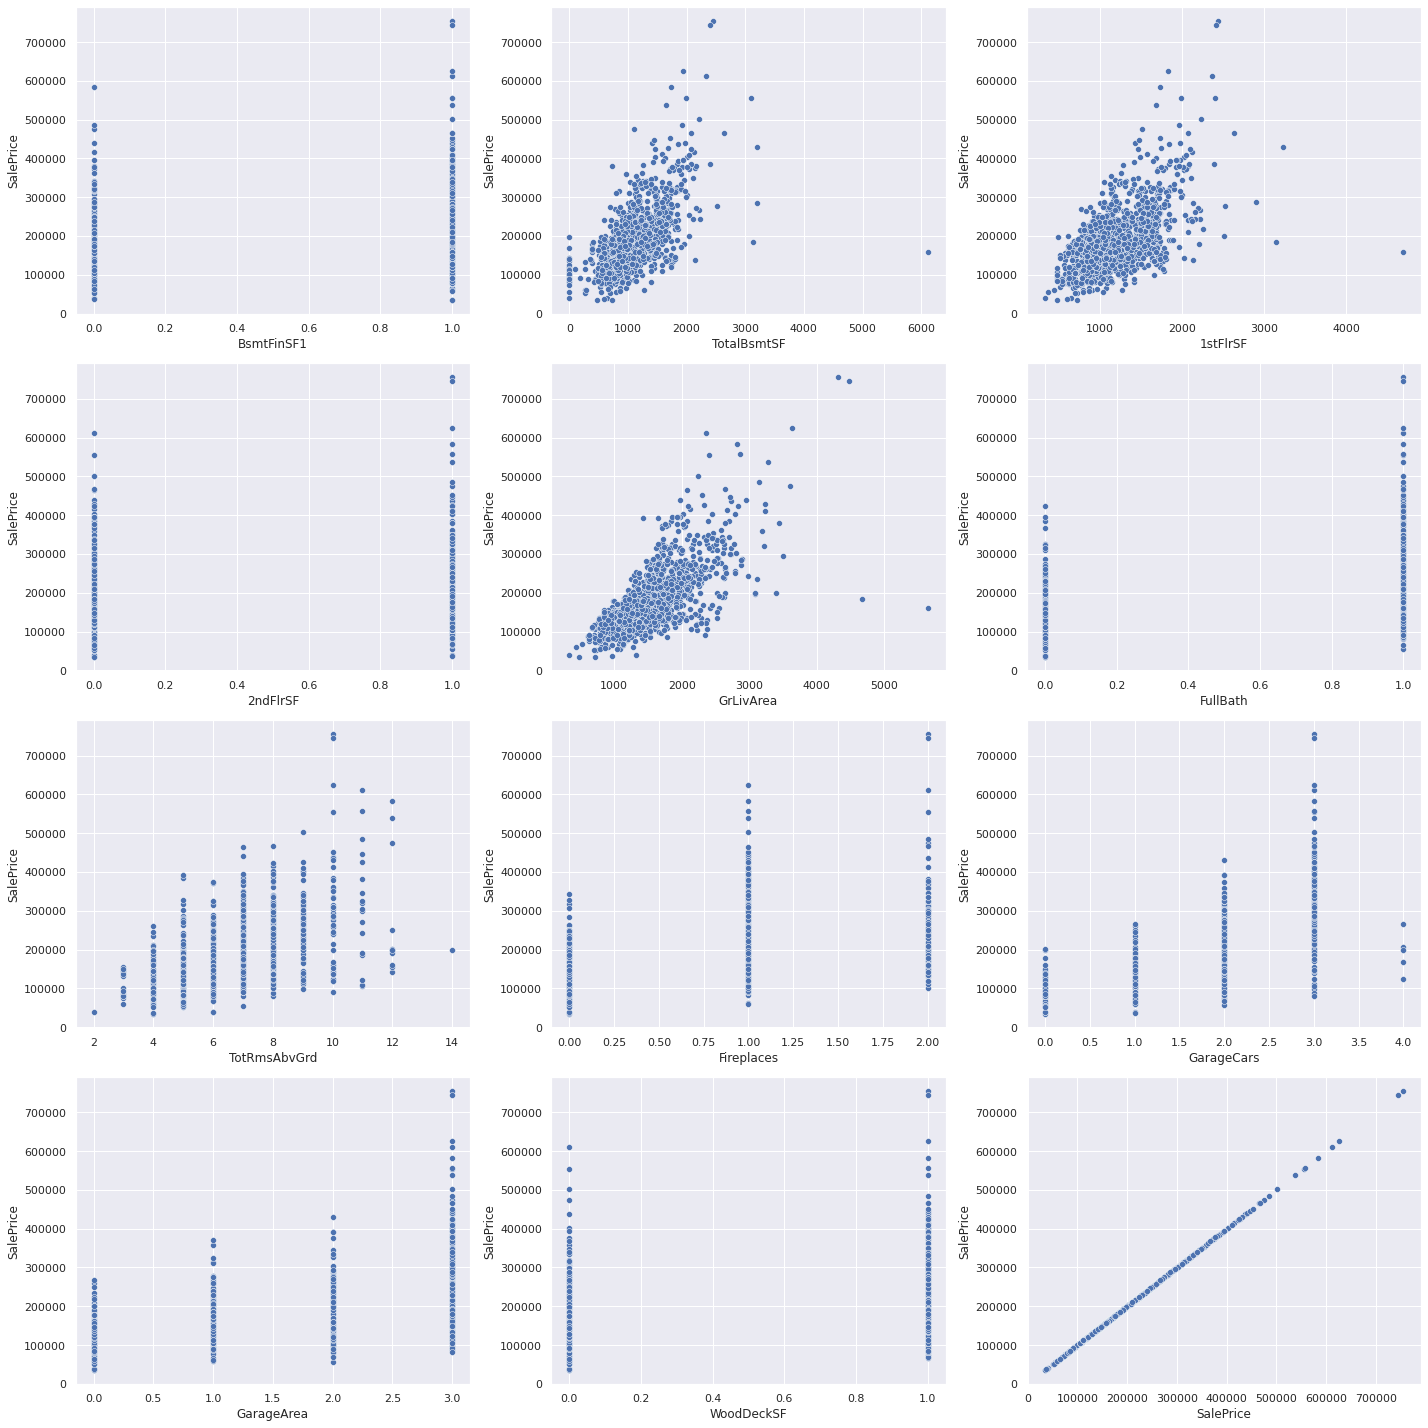

In [47]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
idx = 0
for  i in range(4):
    for j in range(3):
        if idx < len(numerical_quintatif_cols):
            sns.scatterplot(x=numerical_quintatif_cols[idx], y='SalePrice', data=data_train_encode, ax = axs[i][j])
            idx += 1

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [49]:
all_dataset = pd.concat((data_train_filter_outlier, data_test_encode),axis=0)
all_dataset.shape

(2725, 51)

In [50]:
nominal_cols = []
other_cols = []
for column in all_dataset.columns.values:
    if column in categorical_nominal_cols or column in categorical_bool_cols:
        nominal_cols.append(column)
    else:
        other_cols.append(column)

print('nominal_cols', len(nominal_cols))
print('other_cols', len(other_cols))

nominal_cols 26
other_cols 25


In [51]:
other_cols

['OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'WoodDeckSF',
 'Fence',
 'SalePrice']

In [52]:
onehot = OneHotEncoder()
scaler = StandardScaler()

pd_all_data = pd.concat((data_train_filter_outlier, data_test_encode), axis=0)

onehot.fit(pd_all_data[nominal_cols])
scaler.fit(pd_all_data[other_cols])

StandardScaler()

In [53]:
pd_all_data.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,Fence,SaleType,SaleCondition,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2003,0,0,0,0,0,1,0,1.0,0.0,2.0,1.0,856.0,0,1,0,0,856,1,1710,1,1.0,8,0,0,0.0,0,2.0,2.0,2.0,1.0,0,0.0,0,0,208500
1,1,0,0,0,0,0,1,0,1,1,0,0,1,2,1,1976,0,0,1,1,1,0,1,1.0,1.0,2.0,1.0,1262.0,0,1,0,0,1262,0,1262,1,0.0,6,0,1,0.0,0,2.0,2.0,1.0,1.0,1,0.0,0,0,181500
2,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,2002,0,0,0,0,0,1,0,1.0,1.0,2.0,1.0,920.0,0,1,0,0,920,1,1786,1,1.0,6,0,1,0.0,0,2.0,2.0,3.0,1.0,0,0.0,0,0,223500
3,2,0,0,1,0,0,2,0,2,0,0,0,0,3,0,1970,0,0,2,2,1,0,2,0.0,0.0,2.0,1.0,756.0,0,1,0,0,961,1,1717,0,1.0,7,0,1,1.0,1,1.0,3.0,3.0,1.0,0,0.0,0,1,140000
4,0,0,0,1,0,0,1,0,3,0,0,0,0,4,0,2000,0,0,0,0,0,1,0,1.0,1.0,2.0,1.0,1145.0,0,1,0,0,1145,1,2198,1,1.0,9,0,1,0.0,0,2.0,3.0,3.0,1.0,1,0.0,0,0,250000


In [54]:
def getSelectedData(pd_data, nominal_cols, other_cols):
    nominal_col_feature = onehot.transform(pd_data[nominal_cols]).toarray()
    other_col_feature = scaler.transform(pd_data[other_cols])
    x = np.concatenate((nominal_col_feature,  other_col_feature[:,:-1]),axis=1)
    y = other_col_feature[:,-1]
    return x, y, nominal_col_feature, other_col_feature

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, y_train, _, _ = getSelectedData(data_train_filter_outlier, nominal_cols, other_cols)
x_test, _, _, numerical_feature = getSelectedData(data_test_encode, nominal_cols, other_cols)

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=2022)

In [57]:
y_train_split

array([0.32850622, 1.784862  , 0.03048748, ..., 0.81770681, 0.94141271,
       0.46908111])

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [59]:
def checkValidation(y_valid, y_valid_pred):
    r2score = r2_score(y_valid, y_valid_pred)
    mae = mean_absolute_error(y_valid, y_valid_pred)
    mse = mean_squared_error(y_valid, y_valid_pred)
    
    return r2score, mae, mse

In [60]:
summary_prediction = [];

In [61]:
svm = SVR()
svm.fit(x_train_split, y_train_split)
pred = svm.predict(x_val_split)
r2score, mae, mse = checkValidation(y_val_split, pred)
summary_prediction.append(['svm',r2score, mae, mse])

In [62]:
lgbmr = LGBMRegressor(learning_rate=0.01, n_estimators=5000)
lgbmr.fit(x_train_split, y_train_split)
pred = lgbmr.predict(x_val_split)
r2score, mae, mse = checkValidation(y_val_split, pred)
summary_prediction.append(['LGBMRegressor',r2score, mae, mse])

In [63]:
xgb_model = XGBRegressor(n_estimators=2000, learning_rate=0.05)
xgb_model.fit(x_train_split, y_train_split)
pred = xgb_model.predict(x_val_split)
r2score, mae, mse = checkValidation(y_val_split, pred)
summary_prediction.append(['XGBRegressor',r2score, mae, mse])

In [64]:
pd_summary_prediction = pd.DataFrame(data=summary_prediction, columns=['method','R2Score','MAE', 'MSE'])
pd_summary_prediction.set_index('method', inplace=True)
pd_summary_prediction.head()

,R2Score,MAE,MSE
method,,,
svm,0.896543,0.131120,0.029879
LGBMRegressor,0.881702,0.139949,0.034166
XGBRegressor,0.881639,0.138870,0.034184


In [65]:
selected_model = SVR()
selected_model.fit(x_train, y_train)

SVR()

In [66]:
numerical_feature[:,-1] = selected_model.predict(x_test)
inverse_numerical_feature = scaler.inverse_transform(numerical_feature)
data_test_predict = data_test.copy()
data_test_predict['SalePrice'] = np.round(inverse_numerical_feature[:,-1],2)
data_test_predict.head()

,level_0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1460,0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,1,1,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,0,CBlock,0.0,0.0,1.0,468.0,144.0,270.0,882.0,GasA,0,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,0.0,5,Typ,0,0.0,Attchd,1.0,1.0,730.0,1.0,140,0,0,0,120,0,1.0,0,6,2010,WD,Normal,120599.05
1461,1461,1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,2,1,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,0,CBlock,0.0,0.0,2.0,923.0,0.0,406.0,1329.0,GasA,0,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,1.0,6,Typ,0,0.0,Attchd,1.0,1.0,312.0,1.0,393,36,0,0,0,0,0.0,12500,6,2010,WD,Normal,166262.43
1462,1462,2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1,0,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,0,PConc,1.0,0.0,2.0,791.0,0.0,137.0,928.0,GasA,1,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,0.0,6,Typ,1,0.0,Attchd,3.0,2.0,482.0,1.0,212,34,0,0,0,0,1.0,0,3,2010,WD,Normal,191650.07
1463,1463,3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,2,1,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,0,PConc,0.0,0.0,2.0,602.0,0.0,324.0,926.0,GasA,1,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,1.0,7,Typ,1,1.0,Attchd,3.0,2.0,470.0,1.0,360,36,0,0,0,0,0.0,0,6,2010,WD,Normal,197818.28
1464,1464,4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,4,0,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,1,PConc,1.0,0.0,2.0,263.0,0.0,1017.0,1280.0,GasA,1,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,1.0,5,Typ,0,0.0,Attchd,2.0,2.0,506.0,1.0,0,82,0,0,144,0,0.0,0,1,2010,WD,Normal,184051.70


In [67]:
submission = data_test_predict[['Id', 'SalePrice']]
submission.to_csv('./submission.csv', index=False)